# 1) 데이터 읽기

In [12]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2) 결측치 확인

In [13]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Diabetes or NOt')

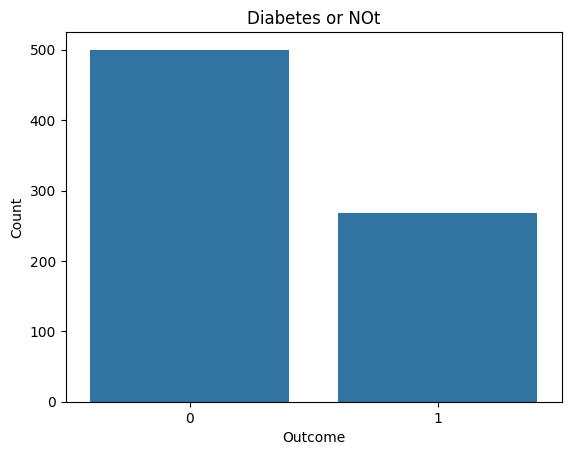

In [14]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Diabetes or NOt")

In [15]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 5) X, Y 나누기

In [16]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

print(X.head())
print()
print(Y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Outcome
0    500
1    268
Name: count, dtype: int64


# 6) 데이터 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


# 7) One-Hot 인코딩

In [18]:
Y = pd.get_dummies(Y).values

Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

# 8) Train데이터, Test데이터 나누기

In [19]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 9) 딥러닝 모델 정의

In [20]:
X_train.shape[0]

614

## 1. 함수형으로 변환

In [21]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(8, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(2, activation = "sigmoid")(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(Adam(learning_rate = 0.04), 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

# 10) 학습, 예측

In [22]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6143 - loss: 0.6249 - val_accuracy: 0.8182 - val_loss: 0.4398
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 0.4919 - val_accuracy: 0.7857 - val_loss: 0.4535
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.4940 - val_accuracy: 0.8052 - val_loss: 0.4632
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7754 - loss: 0.4397 - val_accuracy: 0.7662 - val_loss: 0.4794
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4475 - val_accuracy: 0.8052 - val_loss: 0.4898
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7924 - loss: 0.4362 - val_accuracy: 0.7727 - val_loss: 0.4929
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4420 - val_accuracy: 0.7662 - val_loss: 0.5059
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.4166 - val_accuracy: 0.7597 - val_loss

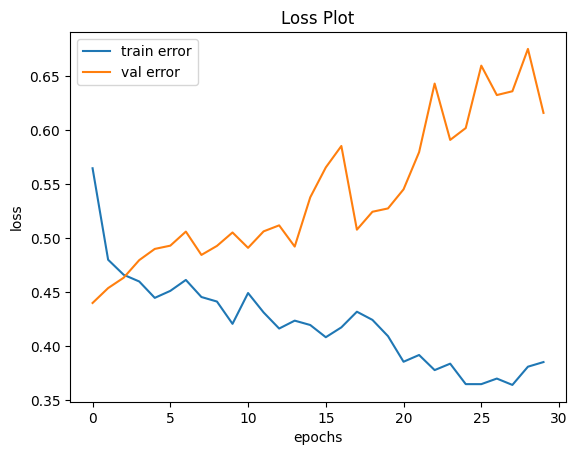

In [23]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [24]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7662337662337663


## 2. 드롭아웃 사용해서 성능비교 해 볼 것

In [25]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

inputs = Input(shape =(8, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer0 = Dropout(0.5)(layer0)
layer1 = Dense(16, activation = "relu")(layer0)
layer1 = Dropout(0.5)(layer1)
prediction = Dense(2, activation = "sigmoid")(layer1)

model2 = Model(inputs = inputs, outputs = prediction)

model2.compile(Adam(learning_rate = 0.04), 'binary_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import numpy as np

model_history=model2.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5975 - loss: 0.6984 - val_accuracy: 0.7727 - val_loss: 0.4926
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7166 - loss: 0.5543 - val_accuracy: 0.7987 - val_loss: 0.4541
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6876 - loss: 0.6066 - val_accuracy: 0.7857 - val_loss: 0.5308
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7078 - loss: 0.5580 - val_accuracy: 0.7857 - val_loss: 0.4627
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.5437 - val_accuracy: 0.7792 - val_loss: 0.4677
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5366 - val_accuracy: 0.8052 - val_loss: 0.4387
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7180 - loss: 0.5657 - val_accuracy: 0.7727 - val_loss: 0.4805
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 0.5364 - val_accuracy: 0.7922 - val_loss

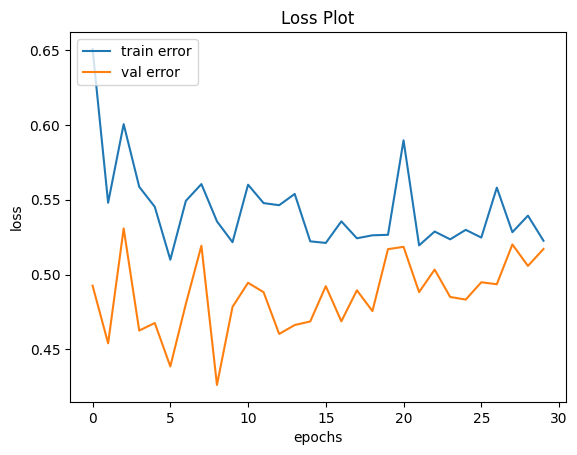

In [27]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [28]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7662337662337663


## 3. 조기종료 사용해볼 것

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8363 - loss: 0.3557 - val_accuracy: 0.7597 - val_loss: 0.6518
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8095 - loss: 0.3560 - val_accuracy: 0.7532 - val_loss: 0.6244
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8193 - loss: 0.3669 - val_accuracy: 0.7468 - val_loss: 0.6639
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


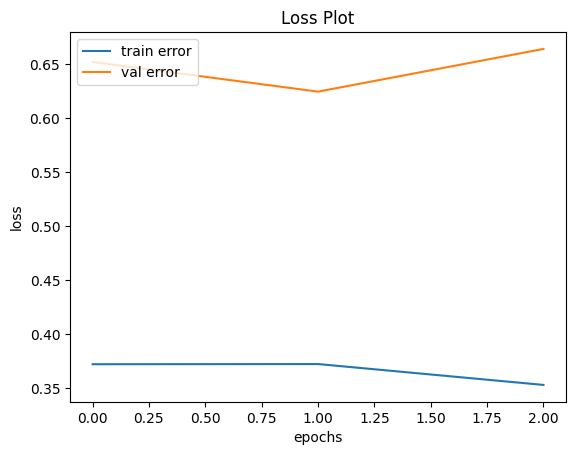

In [29]:
from keras.callbacks import EarlyStopping
import numpy as np

early_stopping = EarlyStopping()

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test), callbacks=[early_stopping])
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [30]:
from sklearn import metrics

# 정확도 계산
scores = metrics.accuracy_score(Y_test, Y_pred_class)
print(scores)

0.7467532467532467
